## Trying to build a one dimentional learning rule

This is based on the COVIS paragdimn for learning in multiple categorization systems

Why:
To do my final exam project I need both a verbal (one dimentional) learning rule and a parralel learning rule through the stiatum. These two pathways will compete in order to give the best response. 
Therefore, I will start by building a simple one dimentional rule in categorisation

COVIS paper: A neuropsychological theory of multiple systems in category learning
link: https://pubmed.ncbi.nlm.nih.gov/9697427/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
n = 10 # The number of trials


Make the matrix of the visual stimuli

Attempt 3:
Here i make the numpy array by manually making the x,y coordinates through gausian sampling

Shape of the 4D array: (100, 3)


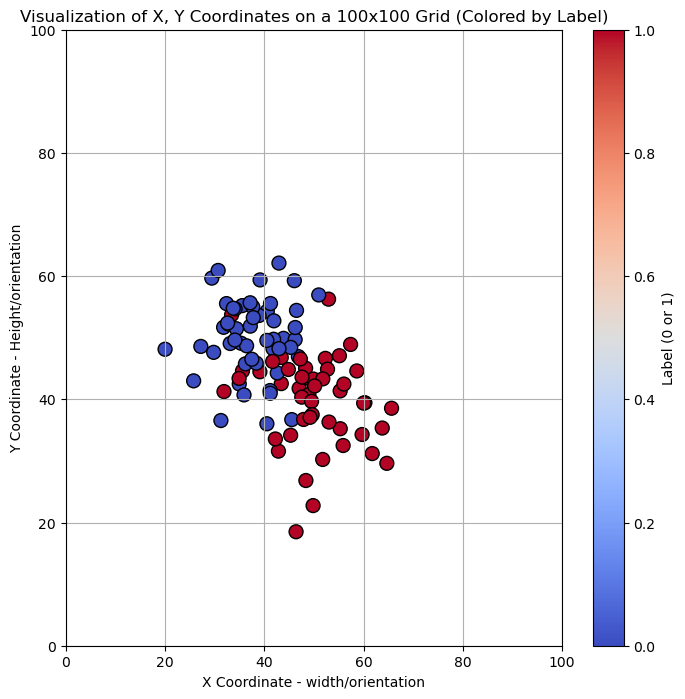

In [20]:
import numpy as np

# Define dimensions (timepoints, 1 x value per timepoint)
timepoints = 100

# Means and standard deviations for Gaussian distributions
std_dev = 7
mean_0x = 40  # For answer = 0
mean_0y = 50 
mean_1x = 50 # For answer = 1
mean_1y = 40

# Initialize arrays
x_values = np.zeros(timepoints)
y_values = np.zeros(timepoints)
answer_values = np.zeros(timepoints)

# Generate data for each timepoint
for t in range(timepoints):
    # Randomly decide answer value (0 or 1)
    answer = np.random.choice([0, 1])
    answer_values[t] = answer
    
    # Generate x and y values based on answer
    if answer == 0:
        x_values[t] = np.random.normal(mean_0x, std_dev)
        y_values[t] = np.random.normal(mean_0y, std_dev)
    else:
        x_values[t] = np.random.normal(mean_1x, std_dev)
        y_values[t] = np.random.normal(mean_1y, std_dev)

# Stack the values into a 4D array (timepoints, 1 value per x, y, and answer)
visual_values = np.stack((x_values, y_values, answer_values), axis=-1)

# Print the resulting array
print(f"Shape of the 4D array: {visual_values.shape}")
#print("Sample values from the array:")
#print(visual_values)

# Visualize the x, y coordinates on a 100x100 grid
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, c=answer_values, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label='Label (0 or 1)')  # Color bar to indicate the labels
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X Coordinate - width/orientation')
plt.ylabel('Y Coordinate - Height/orientation')
plt.title('Visualization of X, Y Coordinates on a 100x100 Grid (Colored by Label)')
plt.grid(True)
plt.show()